In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):  #@save
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [40]:
# help(torch.normal)

In [43]:
# help(torch.matmul)

In [47]:
x = torch.normal(0, 1, (10, 2))
x

tensor([[-0.5812,  1.2636],
        [-0.1741, -0.1147],
        [-0.9984, -0.8556],
        [-0.1562,  1.2781],
        [-0.1326, -1.2282],
        [-2.8827, -0.6562],
        [ 1.7800, -0.5860],
        [-0.7874, -0.3759],
        [-0.8289,  0.1883],
        [-1.5736, -0.6137]])

In [50]:
y = x
y, y.reshape((-1, 1)), len(y)

(tensor([[-0.5812,  1.2636],
         [-0.1741, -0.1147],
         [-0.9984, -0.8556],
         [-0.1562,  1.2781],
         [-0.1326, -1.2282],
         [-2.8827, -0.6562],
         [ 1.7800, -0.5860],
         [-0.7874, -0.3759],
         [-0.8289,  0.1883],
         [-1.5736, -0.6137]]),
 tensor([[-0.5812],
         [ 1.2636],
         [-0.1741],
         [-0.1147],
         [-0.9984],
         [-0.8556],
         [-0.1562],
         [ 1.2781],
         [-0.1326],
         [-1.2282],
         [-2.8827],
         [-0.6562],
         [ 1.7800],
         [-0.5860],
         [-0.7874],
         [-0.3759],
         [-0.8289],
         [ 0.1883],
         [-1.5736],
         [-0.6137]]),
 10)

In [45]:
y = torch.matmul(x.T, x)


In [11]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [15]:
features, len(true_w)

(tensor([[-0.6123,  0.2773],
         [-1.1638,  0.6966],
         [-0.4281,  0.4518],
         ...,
         [-0.0339, -1.8740],
         [-1.7841, -2.3752],
         [-0.6075, -0.2434]]),
 2)

In [20]:
x = torch.tensor([[1, 2]])
len(x)

1

In [22]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.6123,  0.2773]) 
label: tensor([2.0265])


In [34]:
len(features), features

(1000,
 tensor([[-0.6123,  0.2773],
         [-1.1638,  0.6966],
         [-0.4281,  0.4518],
         ...,
         [-0.0339, -1.8740],
         [-1.7841, -2.3752],
         [-0.6075, -0.2434]]))

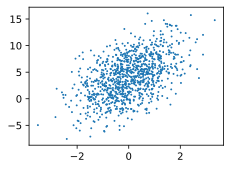

In [31]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1)

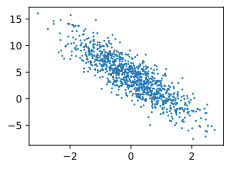

In [32]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [35]:
def data_iter(batch_size, features, labels):
    num_examples = len(features) # 1000
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [37]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4332,  1.1721],
        [ 1.1394,  1.9643],
        [-0.1523, -1.7883],
        [ 0.8385,  0.0190],
        [-1.4348,  0.2877],
        [-0.2495, -0.2844],
        [ 0.3896, -0.3411],
        [-0.1461, -0.4706],
        [-0.5089,  0.3722],
        [ 2.6500, -0.5086]]) 
 tensor([[ 1.0819],
        [-0.2060],
        [ 9.9535],
        [ 5.8409],
        [ 0.3550],
        [ 4.6503],
        [ 6.1284],
        [ 5.5130],
        [ 1.9204],
        [11.2085]])


In [67]:
def linreg(X, w, b): #@save
    return torch.matmul(X, w) + b

In [68]:
def squared_loss(y_hat, y):  #@save
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [69]:
def sgd(params, lr, batch_size):  #@save
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad_zero_()

In [70]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [73]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [74]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch { epoch + 1}, loss {float(train_l.mean()):f}')

AttributeError: 'Tensor' object has no attribute 'grad_zero_'